In [117]:
import pandas as pd
import numpy as np
#import sklearn
import pickle 
import time 
import datetime
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [118]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

In [130]:
df = pd.read_csv('./240404_meged.csv')
df = df[['L2' not in l and 'L1' not in l for l in df.model]]
#df['diff'] = abs(merged_df['train_frate'] - merged_df['test_frate'])
df = df[(df.test_frate <= 0.005) & (0.009 < df.train_frate) & (df.train_frate < 0.51)]

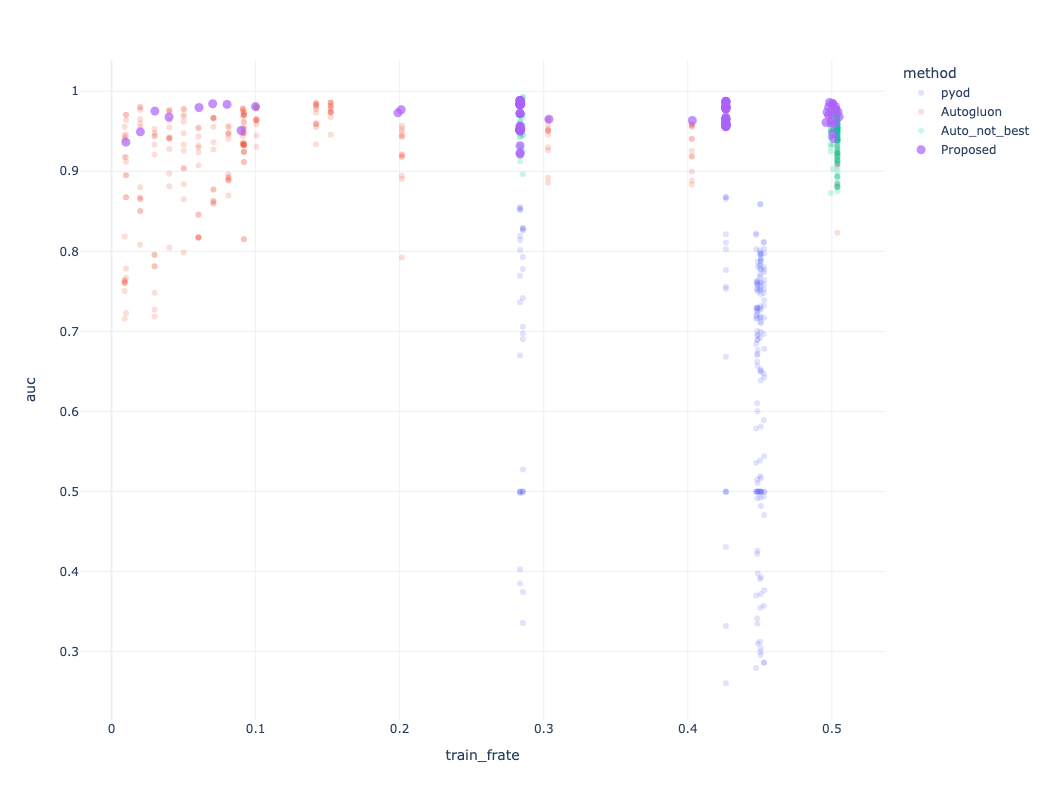

In [131]:
fig = px.scatter(
    df,
    x='train_frate',y='auc',
    color='method',
    hover_data='model',
    opacity=0.2,
    #---#
    width = 750,
    height = 800  
)
fig.data[3]['marker']['opacity'] = 0.7
fig.data[3]['marker']['size'] = 9
fig

In [113]:
df.sort_values('auc',ascending=False)

,model,time,acc,pre,rec,f1,auc,graph_based,method,throw_rate,train_size,train_cols,train_frate,test_size,test_frate,hyper_params,theta,gamma
449,LightGBMLarge,NaN,0.969253,0.014235,1.000000,0.028070,0.993073,False,Auto_not_best,0.200000,21021,['amt'],0.285524,9009,0.000444,NaN,NaN,NaN
440,LightGBM,NaN,0.978688,0.015464,0.750000,0.030303,0.992018,False,Auto_not_best,0.200000,21021,['amt'],0.285524,9009,0.000444,NaN,NaN,NaN
447,XGBoost,NaN,0.976801,0.014218,0.750000,0.027907,0.986355,False,Auto_not_best,0.200000,21021,['amt'],0.285524,9009,0.000444,NaN,NaN,NaN
596,LightGBM,NaN,0.923909,0.059794,0.966667,0.112621,0.986175,False,Auto_not_best,0.300000,14014,['amt'],0.426431,6006,0.004995,NaN,NaN,NaN
167,LightGBMLarge,NaN,0.998218,0.000000,0.000000,0.000000,0.986131,False,Autogluon,0.107023,39284,['amt'],0.152123,16835,0.001782,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,PCA,0.002272,0.366235,0.000523,0.225131,0.001044,0.295787,False,pyod,0.018146,10010,['amt'],0.450649,259642,0.001471,NaN,NaN,NaN
1618,PCA,0.002297,0.367720,0.000457,0.204918,0.000913,0.286434,False,pyod,0.048196,10010,['amt'],0.452747,86555,0.001410,NaN,NaN,NaN
219,PCA,0.002264,0.362902,0.000490,0.209302,0.000978,0.286217,False,pyod,0.117780,10010,['amt'],0.453047,28859,0.001490,NaN,NaN,NaN
633,PCA,0.002195,0.382297,0.000375,0.176471,0.000748,0.279519,False,pyod,0.125497,10010,['amt'],0.447453,25951,0.001310,NaN,NaN,NaN
